In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import math
import seaborn

data = pd.read_csv('A_Z Handwritten Data.csv') # wczytywanie datasetu

In [85]:
label = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',
         6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',
         12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',
         18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} # ustalenie jaka litera kryje się pod danym indexem

data.iloc[:,0] = data.iloc[:,0].map(label) # odniesienie do, iloc[: (wszystkie wiersze), 0 (pierwsza kolumna)] i zmapowanie na nowe wartości opisane przez label

In [86]:
row_count = data['0'].value_counts() # pobieranie liczby wierszy dla danej kategorii
min_row_count = row_count.min()

short_data = data.groupby('0').apply(lambda x: x.sample(n=80, replace=False))

short_data = short_data.reset_index(drop=True) #resetowanie indeksacji dataframeu

In [87]:
class DataProcessing:
    @staticmethod
    def shuffling(data_list):
        for i in range(len(data_list)-1,0,-1):
            index = random.randint(0,i-1)
            data_list.loc[i], data_list.loc[index] = data_list.loc[index], data_list.loc[i]

    @staticmethod
    def normalize(data_list):
        for col in data_list.columns:
            if col != '0':
                for i in range(len(data_list[col])):
                    if data_list.at[i, col] != 0:
                        data_list.at[i, col] = 1

    @staticmethod
    def train_test_split(data_list,prc):
        train_len = round((len(data_list)) * prc)
        #test_len = round((len(data_list)) * 0.4)
        
        train = data_list[0:train_len]
        test = data_list[train_len:len(data_list)]

        test = test.reset_index(drop=True) #resetowanie indeksacji dataframeu

        return train, test
    
    @staticmethod
    def label_split(data_list):
        feature_list = []
        label_list = []

        sum = 0
        for col in data_list.columns:
            if col != '0':
                sum +=1
        
        for i in range(len(data_list)):
            feature_list.append(data_list.loc[i].to_list()[len(data_list.columns)-sum:])

        for i in range(len(data_list)):
            label_list.append(data_list.loc[i].to_list()[:len(data_list.columns)-sum][0])
        
        return feature_list, label_list

In [88]:
DataProcessing.normalize(short_data)

In [89]:
DataProcessing.shuffling(short_data)

In [90]:
train_data, test_data = DataProcessing.train_test_split(short_data, 0.6)

In [91]:
def Minkowski_dist(x,y,m):
    res=0
    for i in range(len(x)):
        res += (abs(x[i] - y[i]))**m

    res = math.pow(res,1.0/m)

    return res

def KNN_algorithm(list, data, k, m):

    distances = []

    feature_list, label_list = DataProcessing.label_split(list)

    for i, elem in enumerate(feature_list):
       distances.append([Minkowski_dist(elem,data,m),i])

    distances = sorted(distances)

    k_dist = distances[:k]

    lw={}

    for x in label_list:
        lw[x] = 0

    #print(lw)

    for elem in k_dist:
        lw[label_list[elem[1]]] += 1

    #print(lw)

    max_elem = float("-inf")

    for elem in lw:
        if lw[elem] > max_elem:
            max_elem = lw[elem]
            category = elem

    return category

In [92]:
all=0
good=0
bad=0

sum = 0
for col in short_data.columns:
    if col != "0":
        sum +=1

data, actual = DataProcessing.label_split(test_data)

predicted = []

for i in range(len(test_data)):

    result = KNN_algorithm(train_data, test_data.loc[i].to_list()[len(short_data.columns)-sum:], 1, 2) # najlepszy rezultat dla k=1, m=2
    predicted.append(result)

    if result == test_data.loc[i].to_list()[:1][0]:
        good += 1
    else:
        bad += 1

    all += 1

print("k = 1, m = 2 (k - ilość sąsiadów branych pod uwagę)")
print(f"All: {all}, good: {good}, bad: {bad}")
print(f"Test statistic: {round(good/all*100,2)}%")

k = 1, m = 2 (k - ilość sąsiadów branych pod uwagę)
All: 832, good: 616, bad: 216
Test statistic: 74.04%


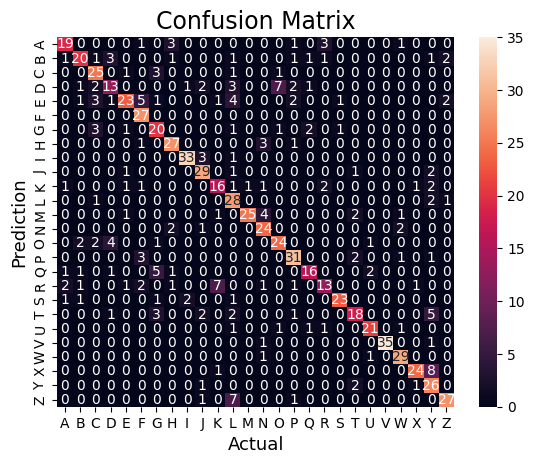

In [93]:
cm = metrics.confusion_matrix(actual, predicted)
seaborn.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [94]:
all=0
good=0
bad=0

sum = 0
for col in short_data.columns:
    if col != "0":
        sum +=1

data, actual = DataProcessing.label_split(test_data)

predicted = []

for i in range(len(test_data)):

    result = KNN_algorithm(train_data, test_data.loc[i].to_list()[len(short_data.columns)-sum:], 4, 2) # najlepszy rezultat dla k=1, m=2
    predicted.append(result)

    if result == test_data.loc[i].to_list()[:1][0]:
        good += 1
    else:
        bad += 1

    all += 1

print("k = 4, m = 2 (k - ilość sąsiadów branych pod uwagę)")
print(f"All: {all}, good: {good}, bad: {bad}")
print(f"Test statistic: {round(good/all*100,2)}%")

k = 4, m = 2 (k - ilość sąsiadów branych pod uwagę)
All: 832, good: 605, bad: 227
Test statistic: 72.72%


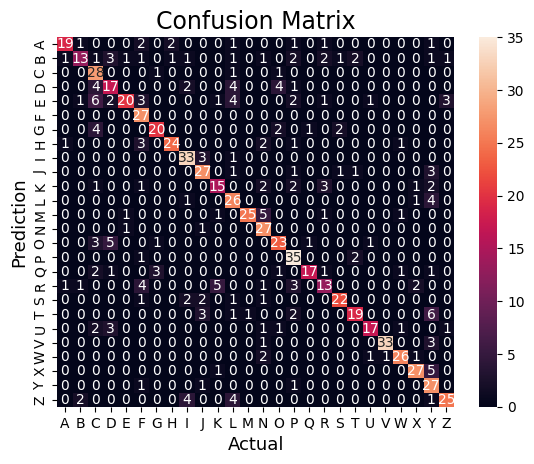

In [95]:
cm = metrics.confusion_matrix(actual, predicted)
seaborn.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [96]:
all=0
good=0
bad=0

sum = 0
for col in short_data.columns:
    if col != "0":
        sum +=1

data, actual = DataProcessing.label_split(test_data)

predicted = []

for i in range(len(test_data)):

    result = KNN_algorithm(train_data, test_data.loc[i].to_list()[len(short_data.columns)-sum:], 1, 1) # najlepszy rezultat dla k=1, m=2
    predicted.append(result)

    if result == test_data.loc[i].to_list()[:1][0]:
        good += 1
    else:
        bad += 1

    all += 1

print("k = 1, m = 1 (k - ilość sąsiadów branych pod uwagę)")
print(f"All: {all}, good: {good}, bad: {bad}")
print(f"Test statistic: {round(good/all*100,2)}%")

k = 1, m = 1 (k - ilość sąsiadów branych pod uwagę)
All: 832, good: 612, bad: 220
Test statistic: 73.56%


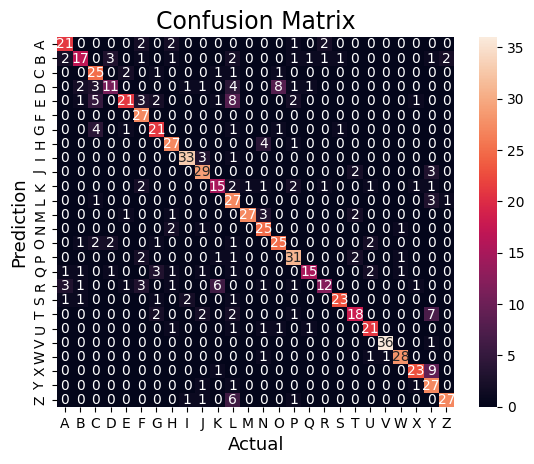

In [97]:
cm = metrics.confusion_matrix(actual, predicted)
seaborn.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()